In [70]:
models = ["bert-multilingual", "xlm-roberta", "qwen"]
tasks = ["NER", "NLI", "DP", "POS"]
rows = []
for model in models:
    for task in tasks:
        with open(f"output/{model}/base_finetuned/{task}.txt", "r") as f:
            lines = f.readlines()
        lines = [l.strip() for l in lines if l!="\n"]
        curr_line = 0
        print(lines)
        en_base_score = 0
        while curr_line < len(lines):
            lang = lines[curr_line].split(" ")[1][:2]
            if lang == "en":
                lang = "base"
            best_lambda = lines[curr_line + 1].split(" ")[-1]
            if task == "DP":
                score = lines[curr_line + 2].split(" ")[2][:-1]
                score = float(score)/100
            else: 
                score = lines[curr_line + 2].split(" ")[-1]

            if lang == "base":
                en_base_score = float(score)
            if model == "bert-multilingual":
                m = "mBERT"
            elif model == "xlm-roberta":
                m = "XLM-R"
            else:
                m = "Qwen"
            delta = en_base_score - float(score)
            rows.append([task, m, lang, float(best_lambda), float(score), delta])
            curr_line += 3
df_test_scores = pd.DataFrame(rows, columns=["task", "model", "language", "lambda", "score", "delta"])
df_test_scores["delta"]
df_test_scores

['======language: en=======', 'best lambda: 0.0', 'accuracy: 0.9455241076474936', '======language: es=======', 'best lambda: 0.9', 'accuracy: 0.9283257360718987', '======language: hi=======', 'best lambda: 0.9', 'accuracy: 0.8926336122016381', '======language: de=======', 'best lambda: 0.6', 'accuracy: 0.8857528150495584', '======language: zh=======', 'best lambda: 0.8', 'accuracy: 0.8381554196558716', '======language: fr=======', 'best lambda: 1.0', 'accuracy: 0.9116786347141997', '======language: ru=======', 'best lambda: 0.7', 'accuracy: 0.9124956652410126']
['======language: en=======', 'best lambda: 0.0', 'accuracy: 0.8259481037924151', '======language: es=======', 'best lambda: 0.3', 'accuracy: 0.7377245508982035', '======language: hi=======', 'best lambda: 0.1', 'accuracy: 0.5964071856287425', '======language: de=======', 'best lambda: 0.0', 'accuracy: 0.7091816367265469', '======language: zh=======', 'best lambda: 0.0', 'accuracy: 0.6950099800399202', '======language: fr=======

,task,model,language,lambda,score,delta
0,NER,mBERT,base,0.0,0.945524,0.000000
1,NER,mBERT,es,0.9,0.928326,0.017198
2,NER,mBERT,hi,0.9,0.892634,0.052890
3,NER,mBERT,de,0.6,0.885753,0.059771
4,NER,mBERT,zh,0.8,0.838155,0.107369
...,...,...,...,...,...,...
79,POS,Qwen,hi,0.2,0.086349,0.815792
80,POS,Qwen,de,0.2,0.362140,0.540001
81,POS,Qwen,zh,0.0,0.206823,0.695318
82,POS,Qwen,fr,0.2,0.297552,0.604589


/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/4277458240.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/4277458240.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/4277458240.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/4277458240.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, 

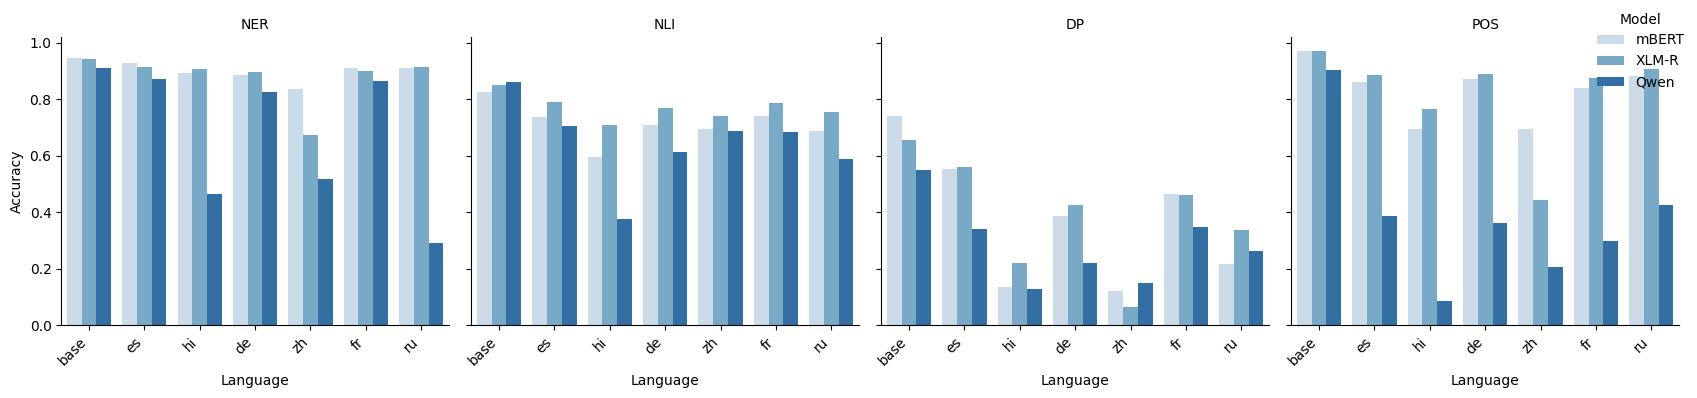

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# --- Create a FacetGrid with 4 subplots, one for each task ---
g = sns.FacetGrid(
    df_test_scores,
    col="task",
    col_wrap=4,  
    sharey=True,    
    sharex=False, 
    height=4,
)

# --- Map a grouped barplot onto each facet ---
g.map_dataframe(
    sns.barplot,
    x="language",
    y="score",
    hue="model",
    palette="Blues"
)

# --- Customize ---
g.add_legend(title="Model", loc="upper right")
g.set_axis_labels("Language", "Accuracy")
g.set_titles("{col_name}")
for t, l in zip(g._legend.texts, ["mBERT", "XLM-R"]):
    t.set_text(l)
# Make x labels readable
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

   task  model language  lambda     score     delta
0   NER  mBERT     base     0.0  0.945524  0.000000
1   NER  mBERT       es     0.9  0.928326  0.017198
2   NER  mBERT       hi     0.9  0.892634  0.052890
3   NER  mBERT       de     0.6  0.885753  0.059771
4   NER  mBERT       zh     0.8  0.838155  0.107369
..  ...    ...      ...     ...       ...       ...
79  POS   Qwen       hi     0.2  0.086349  0.815792
80  POS   Qwen       de     0.2  0.362140  0.540001
81  POS   Qwen       zh     0.0  0.206823  0.695318
82  POS   Qwen       fr     0.2  0.297552  0.604589
83  POS   Qwen       ru     0.1  0.425653  0.476488

[84 rows x 6 columns]


/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/3656291656.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/3656291656.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/3656291656.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


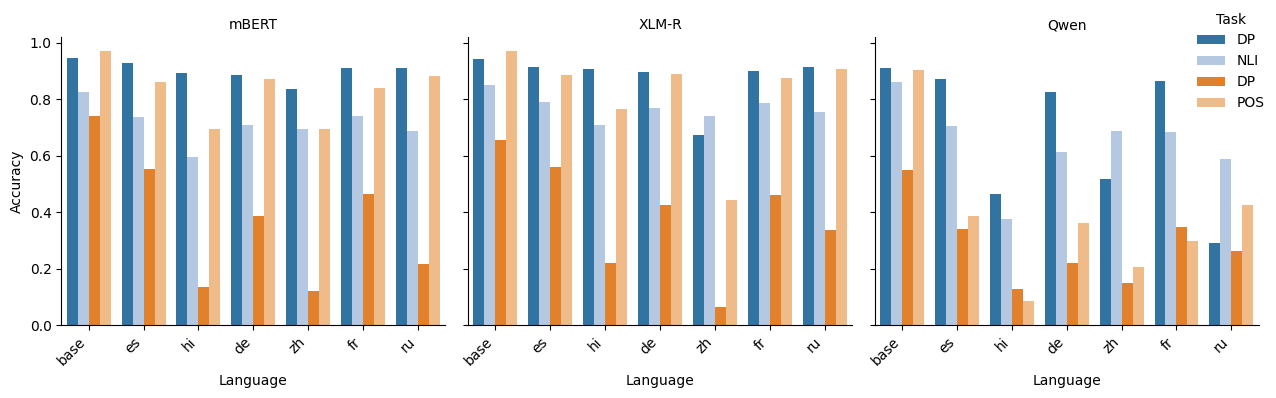

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
print(df_test_scores)


# --- Create a FacetGrid with 4 subplots, one for each task ---
g = sns.FacetGrid(
    df_test_scores,
    col="model",
    col_wrap=3,  
    sharey=True,    
    sharex=False, 
    height=4,
)
custom_palette = ["#6276F0", "#2E3770", "#90E082", "#40663B"]
# --- Map a grouped barplot onto each facet ---
g.map_dataframe(
    sns.barplot,
    x="language",
    y="score",
    hue="task",
    palette="tab20"
)

# --- Customize ---
g.add_legend(title="Task", loc="upper right")
g.set_axis_labels("Language", "Accuracy")
g.set_titles("{col_name}")
for t, l in zip(g._legend.texts, ["DP"]):
    t.set_text(l)
# Make x labels readable
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

   task  model language  lambda     score     delta
0   NER  mBERT     base     0.0  0.945524  0.000000
1   NER  mBERT       es     0.9  0.928326  0.017198
2   NER  mBERT       hi     0.9  0.892634  0.052890
3   NER  mBERT       de     0.6  0.885753  0.059771
4   NER  mBERT       zh     0.8  0.838155  0.107369
..  ...    ...      ...     ...       ...       ...
79  POS   Qwen       hi     0.2  0.086349  0.815792
80  POS   Qwen       de     0.2  0.362140  0.540001
81  POS   Qwen       zh     0.0  0.206823  0.695318
82  POS   Qwen       fr     0.2  0.297552  0.604589
83  POS   Qwen       ru     0.1  0.425653  0.476488

[84 rows x 6 columns]


/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/2948614543.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/2948614543.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/2948614543.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


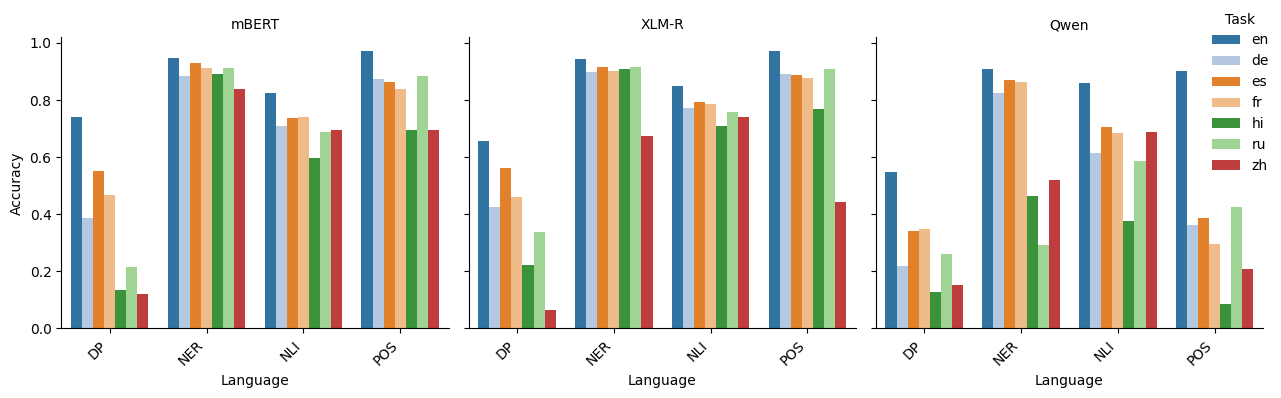

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
print(df_test_scores)
df_test_scores = df_test_scores.sort_values(by=["language", "task"])


# --- Create a FacetGrid with 4 subplots, one for each task ---
g = sns.FacetGrid(
    df_test_scores,
    col="model",
    col_wrap=3,  
    sharey=True,    
    sharex=False, 
    height=4,
)
# --- Map a grouped barplot onto each facet ---
g.map_dataframe(
    sns.barplot,
    x="task",
    y="score",
    hue="language",
    palette="tab20"
)

# --- Customize ---
g.add_legend(title="Task", loc="upper right")
g.set_axis_labels("Language", "Accuracy")
g.set_titles("{col_name}")
for t, l in zip(g._legend.texts, ["en"]):
    t.set_text(l)

# Make x labels readable
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/223547823.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/223547823.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/223547823.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/223547823.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

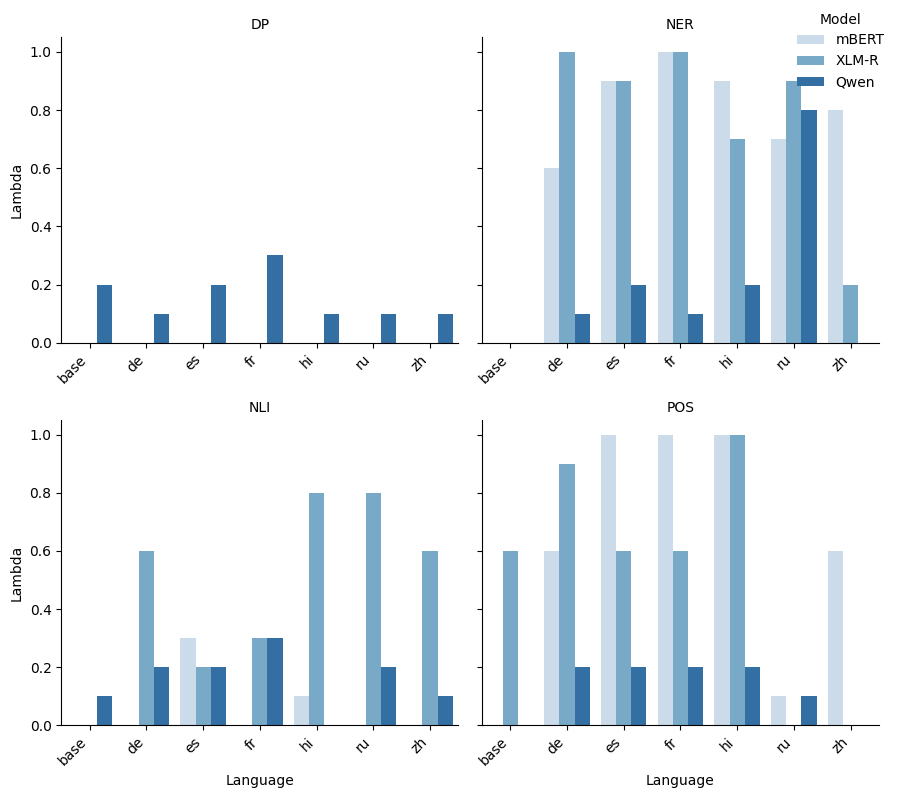

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# --- Create a FacetGrid with 4 subplots, one for each task ---
g = sns.FacetGrid(
    df_test_scores[df_test_scores['language'] != 'en'],
    col="task",
    col_wrap=2,  
    sharey=True,    
    sharex=False, 
    height=4,
)

# --- Map a grouped barplot onto each facet ---
g.map_dataframe(
    sns.barplot,
    x="language",
    y="lambda",
    hue="model",
    palette="Blues"
)

# --- Customize ---
g.add_legend(title="Model", loc="upper right")
g.set_axis_labels("Language", "Lambda")
g.set_titles("{col_name}")
for t, l in zip(g._legend.texts, ["mBERT", "XLM-R"]):
    t.set_text(l)
# Make x labels readable
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [75]:
df_test_scores

,task,model,language,lambda,score,delta
14,DP,mBERT,base,0.0,0.741477,0.000000
42,DP,XLM-R,base,0.0,0.655799,0.000000
70,DP,Qwen,base,0.2,0.548576,0.000000
0,NER,mBERT,base,0.0,0.945524,0.000000
28,NER,XLM-R,base,0.0,0.942421,0.000000
...,...,...,...,...,...,...
39,NLI,XLM-R,zh,0.6,0.741118,0.109182
67,NLI,Qwen,zh,0.1,0.689022,0.171457
25,POS,mBERT,zh,0.6,0.696007,0.274906
53,POS,XLM-R,zh,0.0,0.443381,0.526923


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# --- Create a FacetGrid with 4 subplots, one for each task ---
g = sns.FacetGrid(
    df,
    col="task",
    col_wrap=4,            # ensures 4 side-by-side
    sharey=False,          # scores for DP differ in scale
    height=4
)

# --- Map a grouped barplot onto each facet ---
g.map_dataframe(
    sns.barplot,
    x="language",
    y="delta",
    hue="model",
    palette="Blues"
)

# --- Customize ---
g.add_legend(title="Model", loc="upper right")
g.set_axis_labels("Language", "Accuracy Loss")
g.set_titles("{col_name}")

# Make x labels readable
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

    model language  en_cossim
0   mBERT       es   0.375214
1   mBERT       de   0.353476
2   mBERT       hi   0.282100
3   mBERT       zh   0.324346
4   mBERT       fr   0.387685
5   mBERT       ru   0.316349
6   XLM-R       es   0.675551
7   XLM-R       de   0.653719
8   XLM-R       hi   0.542270
9   XLM-R       zh   0.590074
10  XLM-R       fr   0.688862
11  XLM-R       ru   0.572688
12   Qwen       es   0.553458
13   Qwen       de   0.613834
14   Qwen       hi   0.443339
15   Qwen       zh   0.569123
16   Qwen       fr   0.665774
17   Qwen       ru   0.546002
Model: Qwen
  Spearman rho = -0.509, p = 0.0911

Model: XLM-R
  Spearman rho = -0.594, p = 0.0418

Model: mBERT
  Spearman rho = -0.594, p = 0.0418



/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/424652735.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/424652735.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/424652735.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


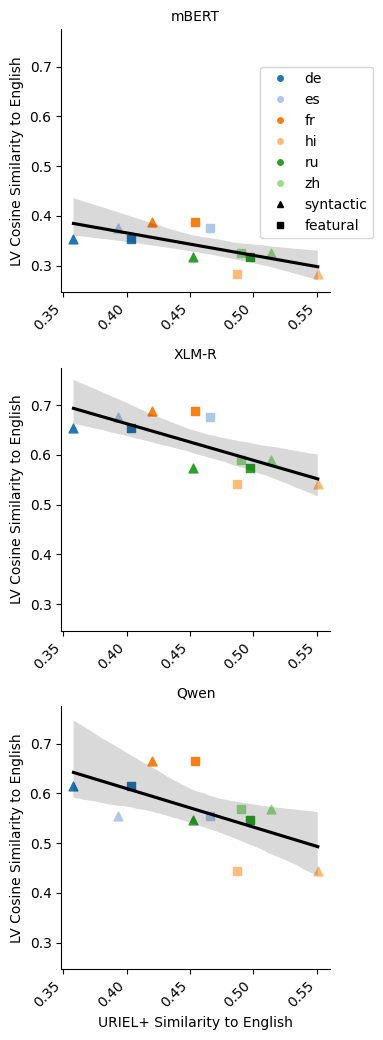

In [77]:
from scipy.stats import spearmanr, pearsonr

# cosine similarity vs tv cosine similarity. 
with open("output/languages/uriel_plus.json", "r") as f:
    uriel = json.load(f)
    f.close()
df2 = pd.read_csv("output/languages/english_cosims.csv")
df2["model"] = df2["model"].replace({
    "bert": "mBERT",
    "roberta": "XLM-R",
    "qwen": "Qwen",

})
print(df2)
uriel_rows = []
for k in[ "syntactic", "featural"]:
    uriel_rows += [[key, val, k] for key, val in uriel[k].items()]

df3 = pd.DataFrame(uriel_rows, columns=["language", "uriel", "type"] )
# Merge df2 into df1 on the 'key' column
df2 = pd.merge(df2, df3, on='language', how="right")
correlations = {}
for model_name, subdf in df2.groupby("model"):
    rho, p = spearmanr(subdf["uriel"], subdf["en_cossim"])#, nan_policy="omit")
    correlations[model_name] = (rho, p)
    print(f"Model: {model_name}")
    print(f"  Spearman rho = {rho:.3f}, p = {p:.3g}")
    print()
    
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# ----------------------------------------------------------
# Marker shapes by type (always black)
# ----------------------------------------------------------
marker_map = {
    "syntactic": "^",
    "featural": "s"
}

# ----------------------------------------------------------
# Colors by language
# ----------------------------------------------------------
languages = sorted(df2["language"].unique())
palette = sns.color_palette("tab20", len(languages))
color_map = dict(zip(languages, palette))


def reg_with_labels(data, **kwargs):

    # Plot each point manually
    for _, row in data.iterrows():
        plt.scatter(
            row["uriel"],
            row["en_cossim"],
            s=40,
            marker=marker_map[row["type"]],
            color=color_map[row["language"]]
        )

    # regression line
    sns.regplot(
        data=data,
        x="uriel",
        y="en_cossim",
        scatter=False,
        color="black"
    )


# ----------------------------------------------------------
# FacetGrid
# ----------------------------------------------------------
g = sns.FacetGrid(
    df2,
    col="model",
    col_wrap=1,
    sharex=False,
    height=3.5,

)
g.map_dataframe(reg_with_labels)

g.set_axis_labels("URIEL+ Similarity to English", "LV Cosine Similarity to English")
g.set_titles("{col_name}")

for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ----------------------------------------------------------
# ONE LEGEND BOX: types (black shapes) + languages (colored dots)
# ----------------------------------------------------------

legend_handles = []



# ---------- Section 2: LANGUAGES (colored dots) ----------
for lang in languages:
    legend_handles.append(
        mlines.Line2D(
            [], [],
            marker='o',
            color=color_map[lang],
            linestyle='None',
            markersize=4,
            label=f"{lang}"
        )
    )
    # ---------- Section 1: TYPE (black shapes) ----------
for type_name, marker in marker_map.items():
    legend_handles.append(
        mlines.Line2D(
            [], [], 
            marker=marker,
            color="black",
            linestyle='None',
            markersize=4,
            label=f"{type_name}"
        )
    )

# Add ONE unified legend box
g.fig.legend(
    handles=legend_handles,
    loc="center right",
    bbox_to_anchor=(1.1, 0.85),
)

plt.tight_layout()
plt.show()


   task  model language  lambda     score     delta
14   DP  mBERT     base     0.0  0.741477  0.000000
42   DP  XLM-R     base     0.0  0.655799  0.000000
70   DP   Qwen     base     0.2  0.548576  0.000000
0   NER  mBERT     base     0.0  0.945524  0.000000
28  NER  XLM-R     base     0.0  0.942421  0.000000
..  ...    ...      ...     ...       ...       ...
39  NLI  XLM-R       zh     0.6  0.741118  0.109182
67  NLI   Qwen       zh     0.1  0.689022  0.171457
25  POS  mBERT       zh     0.6  0.696007  0.274906
53  POS  XLM-R       zh     0.0  0.443381  0.526923
81  POS   Qwen       zh     0.0  0.206823  0.695318

[84 rows x 6 columns]     model language  en_cossim
0   mBERT       es   0.375214
1   mBERT       de   0.353476
2   mBERT       hi   0.282100
3   mBERT       zh   0.324346
4   mBERT       fr   0.387685
5   mBERT       ru   0.316349
6   XLM-R       es   0.675551
7   XLM-R       de   0.653719
8   XLM-R       hi   0.542270
9   XLM-R       zh   0.590074
10  XLM-R       fr   0.

/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/353114113.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/353114113.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/353114113.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_75926/353114113.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

Model: DP
  Spearman rho = -0.598, p = 0.00883

Model: NER
  Spearman rho = -0.042, p = 0.868

Model: NLI
  Spearman rho = -0.294, p = 0.236

Model: POS
  Spearman rho = -0.030, p = 0.906



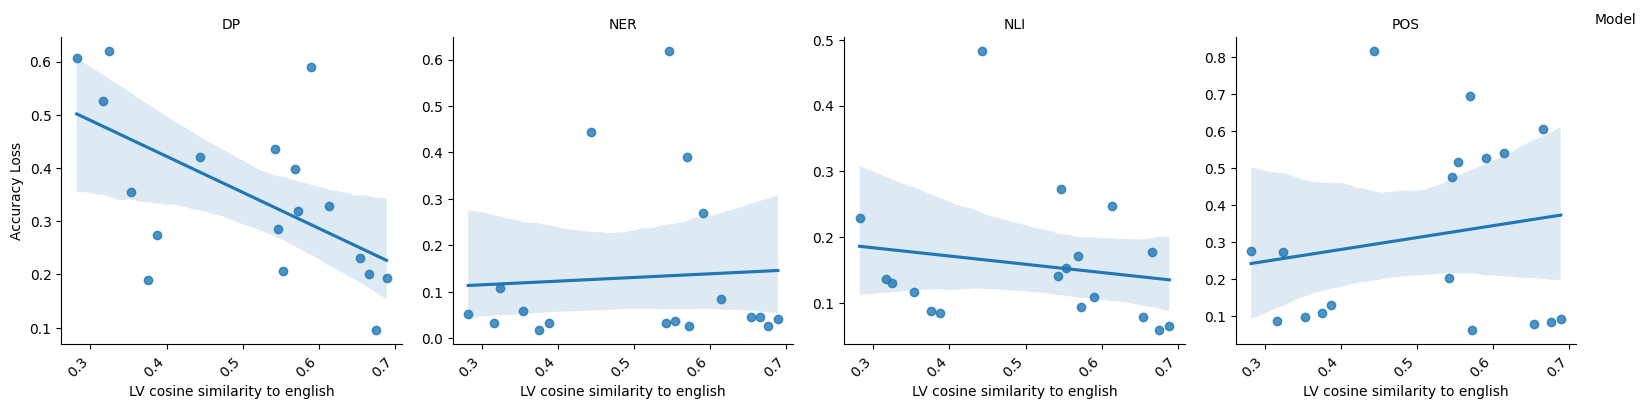

In [78]:
# correlation cosine similarity vs accuracy loss?? 
df2 = pd.read_csv("output/languages/english_cosims.csv")

df4 = pd.merge(df_test_scores, df2, on=["model", "language"], how="right")
print(df_test_scores, df2)
# --- Create a FacetGrid with 4 subplots, one for each task ---
g = sns.FacetGrid(
    df4,
    col="task",
    col_wrap=4,            # ensures 4 side-by-side
    sharey=False,          # scores for DP differ in scale
    height=4
)

# --- Map a grouped barplot onto each facet ---
g.map_dataframe(
    sns.regplot,
    x="en_cossim",
    y="delta",
    # hue="model",
    # palette="Blues"
)

# --- Customize ---
g.add_legend(title="Model", loc="upper right")
g.set_axis_labels("LV cosine similarity to english", "Accuracy Loss")
g.set_titles("{col_name}")

# Make x labels readable
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for model_name, subdf in df4.groupby("task"):
    rho, p = spearmanr(subdf["en_cossim"], subdf["delta"])#, nan_policy="omit")
    correlations[model_name] = (rho, p)
    print(f"Model: {model_name}")
    print(f"  Spearman rho = {rho:.3f}, p = {p:.3g}")
    print()
# plt.tight_layout()
plt.show()

    model language  en_cossim
0   mBERT       es   0.375214
1   mBERT       de   0.353476
2   mBERT       hi   0.282100
3   mBERT       zh   0.324346
4   mBERT       fr   0.387685
5   mBERT       ru   0.316349
6   XLM-R       es   0.675551
7   XLM-R       de   0.653719
8   XLM-R       hi   0.542270
9   XLM-R       zh   0.590074
10  XLM-R       fr   0.688862
11  XLM-R       ru   0.572688
12   Qwen       es   0.553458
13   Qwen       de   0.613834
14   Qwen       hi   0.443339
15   Qwen       zh   0.569123
16   Qwen       fr   0.665774
17   Qwen       ru   0.546002
   task  model language  lambda     score     delta   uriel  en_cossim
0    DP  mBERT       es     0.0  0.552684  0.188793  0.4299   0.375214
1   NER  mBERT       es     0.9  0.928326  0.017198  0.4299   0.375214
2   NLI  mBERT       es     0.3  0.737725  0.088224  0.4299   0.375214
3   POS  mBERT       es     1.0  0.862279  0.108634  0.4299   0.375214
4    DP  XLM-R       es     0.0  0.560609  0.095190  0.4299   0.675551
..  

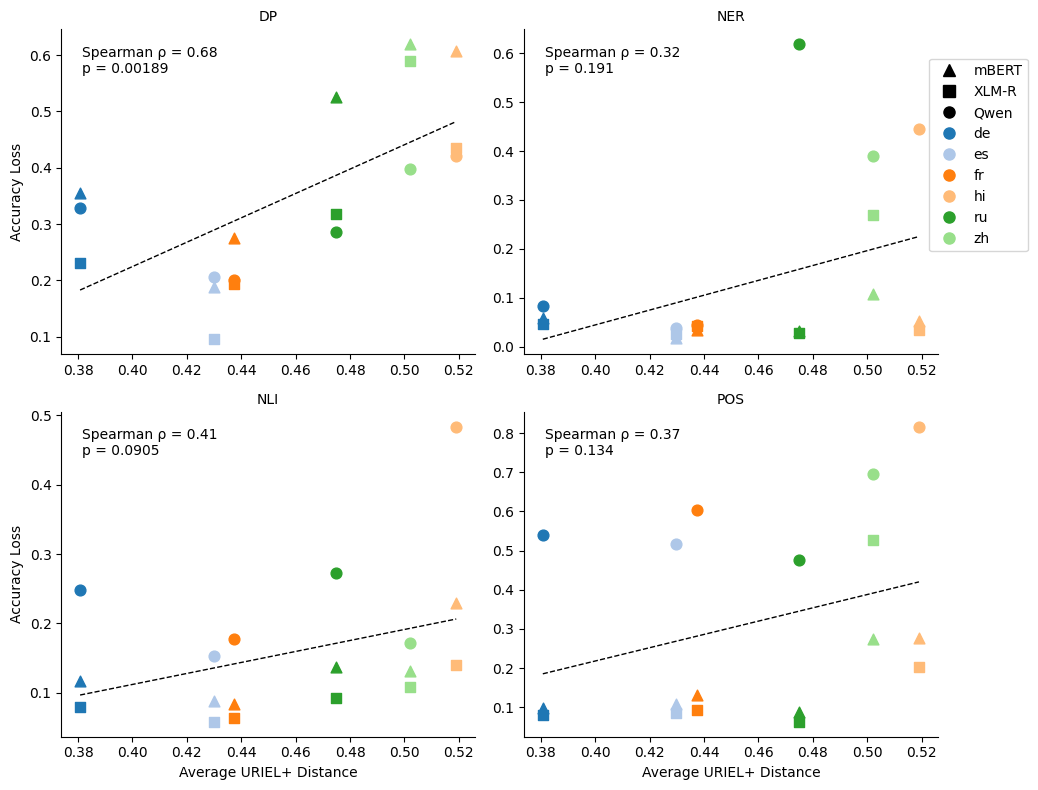

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from matplotlib.lines import Line2D
import numpy as np
# cosine similarity vs tv cosine similarity. 
with open("output/languages/uriel_plus.json", "r") as f:
    uriel = json.load(f)
    f.close()
df2 = pd.read_csv("output/languages/english_cosims.csv")
print(df2)

uriel_langs = {}
for k in["syntactic", "featural"]:
    for lang, val in uriel[k].items():
        if lang not in uriel_langs:
            uriel_langs[lang] = [val]
        else:
            uriel_langs[lang].append(val)
uriel_rows = [[lang, np.mean(val)] for lang, val in uriel_langs.items()]
df3 = pd.DataFrame(uriel_rows, columns=["language", "uriel"] )
df3 = pd.merge(df3, df2, on="language")
# Merge df2 into df1 on the 'key' column
df4 = pd.merge(df_test_scores, df3, on=['language', 'model'], how="right")
print(df4)
languages = sorted(df4["language"].unique())
models = sorted(df4["model"].unique())
# Marker shapes per model
marker_map = {
    "mBERT": "^",
    "XLM-R": "s",
    "Qwen": "o"
}
color_map = dict(zip(languages, sns.color_palette("tab20", len(languages))))


def one_regline_language_color_model_marker(data, x, y, hue_lang, style_model, **kwargs):
    ax = plt.gca()

    # --- unique languages (colors) and models (markers) ---
    languages = sorted(data[hue_lang].unique())
    models = sorted(data[style_model].unique())

    # color palette for languages
    colors = sns.color_palette("tab20", len(languages))
    color_map = dict(zip(languages, colors))

    # --- scatter points ---
    for lang in languages:
        for model in models:
            sub = data[(data[hue_lang] == lang) & (data[style_model] == model)]
            if sub.empty:
                continue

            ax.scatter(
                sub[x], sub[y],
                color=color_map[lang],
                marker=marker_map[model],
                s=60,
                label=f"{lang} ({model})"  # legend cleaned later
            )

    # --- ONE regression line across ALL data ---
    sns.regplot(
        data=data,
        x=x, y=y,
        scatter=False,
        ci=None,
        color="black",
        line_kws={"linewidth": 1.0, "linestyle": "--"},
        ax=ax
    )

    # --- Spearman correlation ---
    rho, p = spearmanr(data[x], data[y])
    ax.text(
        0.05, 0.95,
        f"Spearman ρ = {rho:.2f}\np = {p:.3g}",
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=10,
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none")
    )
    ax.set_xlabel("URIEL+ Syntactic Distance From English")


# --- FacetGrid ---
g = sns.FacetGrid(
    df4,
    col="task",
    col_wrap=2,
    sharey=False,
    sharex=False,
    height=4,
)

# --- map our function: language → color, model → shape ---
g.map_dataframe(
    one_regline_language_color_model_marker,
    x="uriel",
    y="delta",
    hue_lang="language",
    style_model="model"
)

# from matplotlib.lines import Line2D

# # -----------------------
# # MODEL LEGEND (TOP)
# # -----------------------
# Force desired display names:
model_display_names = {
    "mBERT": "mBERT",
    "XLM-R": "XLM-R",
    "Qwen": "Qwen"
}
# model_elements = [
#     Line2D([0], [0],
#            marker=marker_map[m],
#            linestyle='',
#            color='black',
#            markersize=6,
#            label=model_display_names[m])
#     for m in models
# ]
# ----------------------------------------------------------
# ONE LEGEND BOX: types (black shapes) + languages (colored dots)
# ----------------------------------------------------------

legend_handles = []

# ---------- Section 1: TYPE (black shapes) ----------
for type_name, marker in marker_map.items():
    legend_handles.append(
        mlines.Line2D(
            [], [], 
            marker=marker,
            color="black",
            linestyle='None',
            markersize=8,
            label=model_display_names[type_name]
        )
    )

# ---------- Section 2: LANGUAGES (colored dots) ----------
for lang in languages:
    legend_handles.append(
        mlines.Line2D(
            [], [],
            marker='o',
            color=color_map[lang],
            linestyle='None',
            markersize=8,
            label=f"{lang}"
        )
    )
g.set_titles("{col_name}")

# Add ONE unified legend box
g.fig.legend(
    handles=legend_handles,
    loc="center right",
    bbox_to_anchor=(1.3, 0.8),
)
g.set_axis_labels("Average URIEL+ Distance", "Accuracy Loss")
plt.tight_layout()

plt.tight_layout(rect=[0, 0, 1.2, 1])  # leaves 20% of figure width on right



    model language  en_cossim
0   mBERT       es   0.375214
1   mBERT       de   0.353476
2   mBERT       hi   0.282100
3   mBERT       zh   0.324346
4   mBERT       fr   0.387685
5   mBERT       ru   0.316349
6   XLM-R       es   0.675551
7   XLM-R       de   0.653719
8   XLM-R       hi   0.542270
9   XLM-R       zh   0.590074
10  XLM-R       fr   0.688862
11  XLM-R       ru   0.572688
12   Qwen       es   0.553458
13   Qwen       de   0.613834
14   Qwen       hi   0.443339
15   Qwen       zh   0.569123
16   Qwen       fr   0.665774
17   Qwen       ru   0.546002
   task  model language  lambda     score     delta   uriel  en_cossim
0    DP  mBERT       es     0.0  0.552684  0.188793  0.4299   0.375214
1   NER  mBERT       es     0.9  0.928326  0.017198  0.4299   0.375214
2   NLI  mBERT       es     0.3  0.737725  0.088224  0.4299   0.375214
3   POS  mBERT       es     1.0  0.862279  0.108634  0.4299   0.375214
4    DP  XLM-R       es     0.0  0.560609  0.095190  0.4299   0.675551
..  

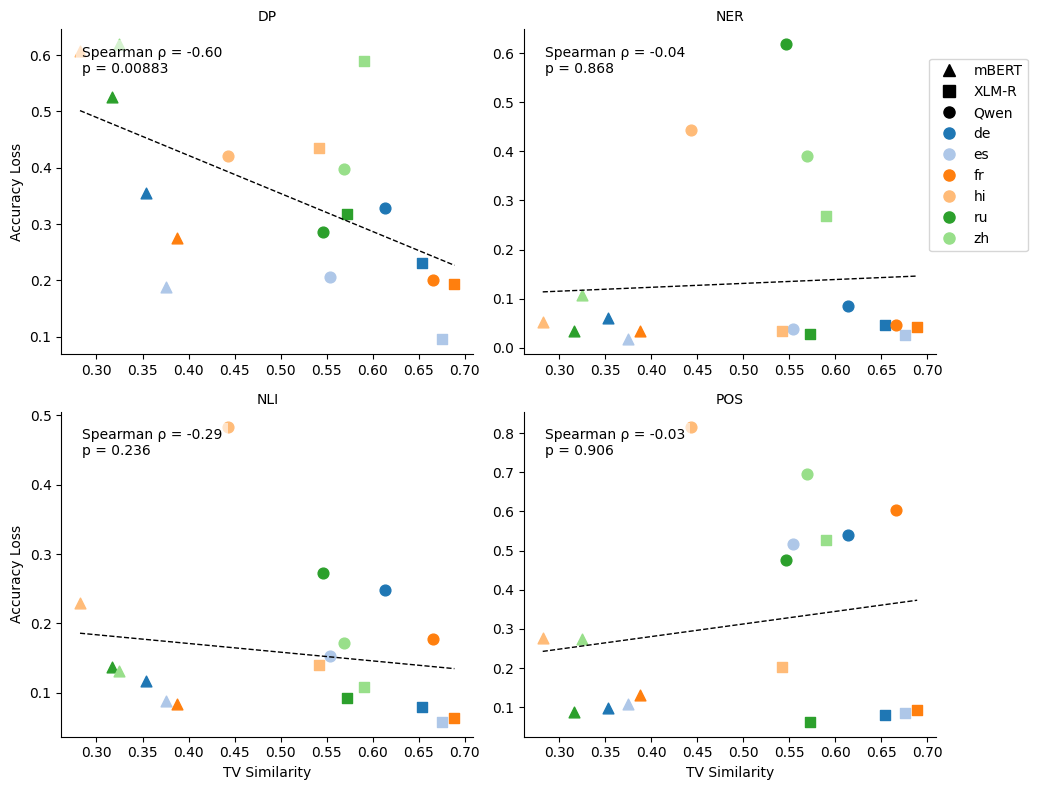

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from matplotlib.lines import Line2D
import numpy as np
# cosine similarity vs tv cosine similarity. 
with open("output/languages/uriel_plus.json", "r") as f:
    uriel = json.load(f)
    f.close()
df2 = pd.read_csv("output/languages/english_cosims.csv")
print(df2)

uriel_langs = {}
for k in["syntactic", "featural"]:
    for lang, val in uriel[k].items():
        if lang not in uriel_langs:
            uriel_langs[lang] = [val]
        else:
            uriel_langs[lang].append(val)
uriel_rows = [[lang, np.mean(val)] for lang, val in uriel_langs.items()]
df3 = pd.DataFrame(uriel_rows, columns=["language", "uriel"] )
df3 = pd.merge(df3, df2, on="language")
# Merge df2 into df1 on the 'key' column
df4 = pd.merge(df_test_scores, df3, on=['language', 'model'], how="right")
print(df4)
languages = sorted(df4["language"].unique())
models = sorted(df4["model"].unique())
# Marker shapes per model
marker_map = {
    "mBERT": "^",
    "XLM-R": "s",
    "Qwen": "o"
}
color_map = dict(zip(languages, sns.color_palette("tab20", len(languages))))


def one_regline_language_color_model_marker(data, x, y, hue_lang, style_model, **kwargs):
    ax = plt.gca()

    # --- unique languages (colors) and models (markers) ---
    languages = sorted(data[hue_lang].unique())
    models = sorted(data[style_model].unique())

    # color palette for languages
    colors = sns.color_palette("tab20", len(languages))
    color_map = dict(zip(languages, colors))

    # --- scatter points ---
    for lang in languages:
        for model in models:
            sub = data[(data[hue_lang] == lang) & (data[style_model] == model)]
            if sub.empty:
                continue

            ax.scatter(
                sub[x], sub[y],
                color=color_map[lang],
                marker=marker_map[model],
                s=60,
                label=f"{lang} ({model})"  # legend cleaned later
            )

    # --- ONE regression line across ALL data ---
    sns.regplot(
        data=data,
        x=x, y=y,
        scatter=False,
        ci=None,
        color="black",
        line_kws={"linewidth": 1.0, "linestyle": "--"},
        ax=ax
    )

    # --- Spearman correlation ---
    rho, p = spearmanr(data[x], data[y])
    ax.text(
        0.05, 0.95,
        f"Spearman ρ = {rho:.2f}\np = {p:.3g}",
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=10,
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none")
    )
    ax.set_xlabel("URIEL+ Syntactic Distance From English")


# --- FacetGrid ---
g = sns.FacetGrid(
    df4,
    col="task",
    col_wrap=2,
    sharey=False,
    sharex=False,
    height=4,
)

# --- map our function: language → color, model → shape ---
g.map_dataframe(
    one_regline_language_color_model_marker,
    x="en_cossim",
    y="delta",
    hue_lang="language",
    style_model="model"
)

# from matplotlib.lines import Line2D

# # -----------------------
# # MODEL LEGEND (TOP)
# # -----------------------
# Force desired display names:
model_display_names = {
    "mBERT": "mBERT",
    "XLM-R": "XLM-R",
    "Qwen": "Qwen"
}
# model_elements = [
#     Line2D([0], [0],
#            marker=marker_map[m],
#            linestyle='',
#            color='black',
#            markersize=6,
#            label=model_display_names[m])
#     for m in models
# ]
# ----------------------------------------------------------
# ONE LEGEND BOX: types (black shapes) + languages (colored dots)
# ----------------------------------------------------------

legend_handles = []

# ---------- Section 1: TYPE (black shapes) ----------
for type_name, marker in marker_map.items():
    legend_handles.append(
        mlines.Line2D(
            [], [], 
            marker=marker,
            color="black",
            linestyle='None',
            markersize=8,
            label=model_display_names[type_name]
        )
    )

# ---------- Section 2: LANGUAGES (colored dots) ----------
for lang in languages:
    legend_handles.append(
        mlines.Line2D(
            [], [],
            marker='o',
            color=color_map[lang],
            linestyle='None',
            markersize=8,
            label=f"{lang}"
        )
    )
g.set_titles("{col_name}")

# Add ONE unified legend box
g.fig.legend(
    handles=legend_handles,
    loc="center right",
    bbox_to_anchor=(1.3, 0.8),
)
g.set_axis_labels("TV Similarity", "Accuracy Loss")
plt.tight_layout()

plt.tight_layout(rect=[0, 0, 1.2, 1])  # leaves 20% of figure width on right



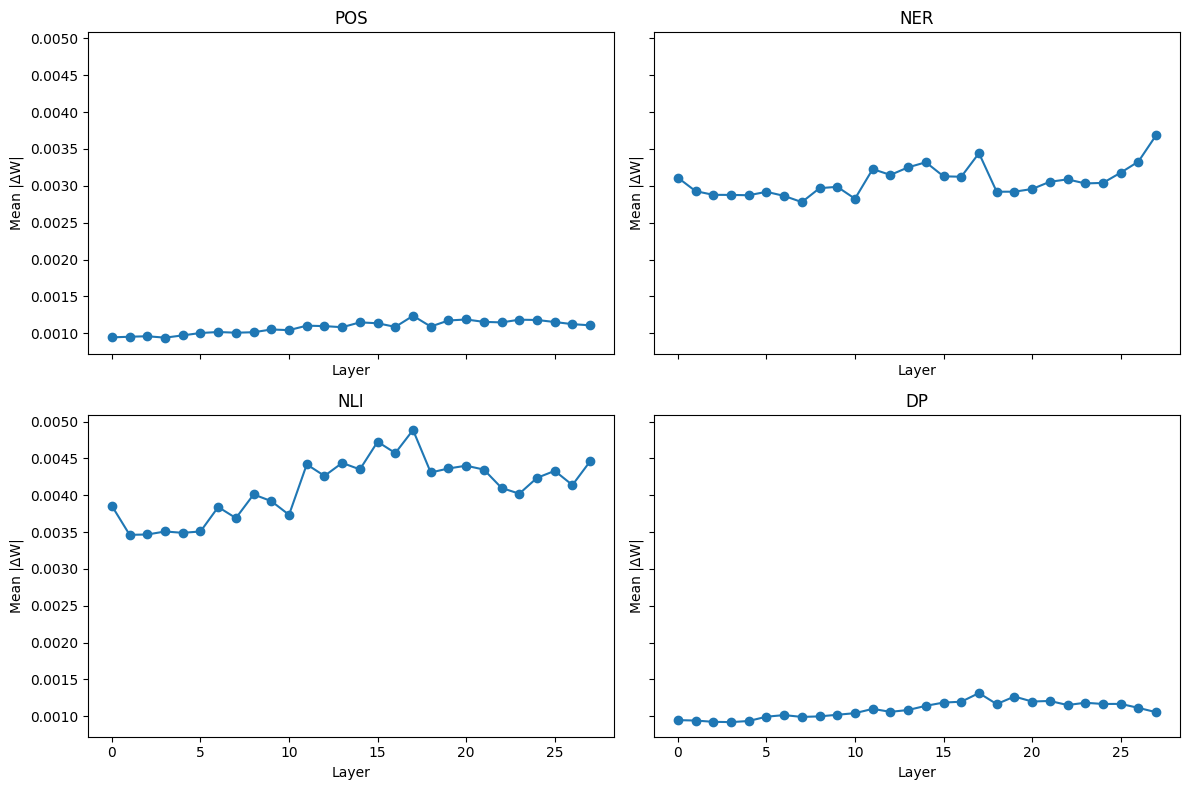

In [111]:
import re
import matplotlib.pyplot as plt
from scripts.task_vectors import TaskVector
from transformers import AutoModelForCausalLM

def get_layer_number(name):
    match = re.search(r"(layers|h|block)\.(\d+)", name)
    if match:
        return int(match.group(2))
    return None

qwen_model = "Qwen/Qwen3-0.6B"
tasks = ["POS_en", "NER_en", "NLI_en", "DP_en"]

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()  # makes indexing easier
base_model =AutoModelForCausalLM.from_pretrained(qwen_model)
for i, task in enumerate(tasks):

    tv = TaskVector(
        pretrained_model=base_model,
        finetuned_model=AutoModelForCausalLM.from_pretrained(
            f"qwen/{task}", local_files_only=True
        ),
    )

    stats = {}

    for name, param in tv.vector.items():
        if "weight" in name:
            stats[name] = {
                "abs_mean": param.data.abs().mean().item()
            }

    layer_means = {}

    for name, values in stats.items():
        layer_num = get_layer_number(name)
        if layer_num is not None:
            layer_means.setdefault(layer_num, []).append(values["abs_mean"])

    # Average per transformer block
    final_means = {
        layer: sum(vals) / len(vals)
        for layer, vals in layer_means.items()
    }

    sorted_layers = sorted(final_means.keys())
    sorted_means = [final_means[i] for i in sorted_layers]

    ax = axes[i]
    ax.plot(sorted_layers, sorted_means, marker="o")
    ax.set_xlabel("Layer")
    ax.set_ylabel("Mean |ΔW|")
    ax.set_title(task.split("_")[0])

# Clean layout
plt.tight_layout()
plt.show()

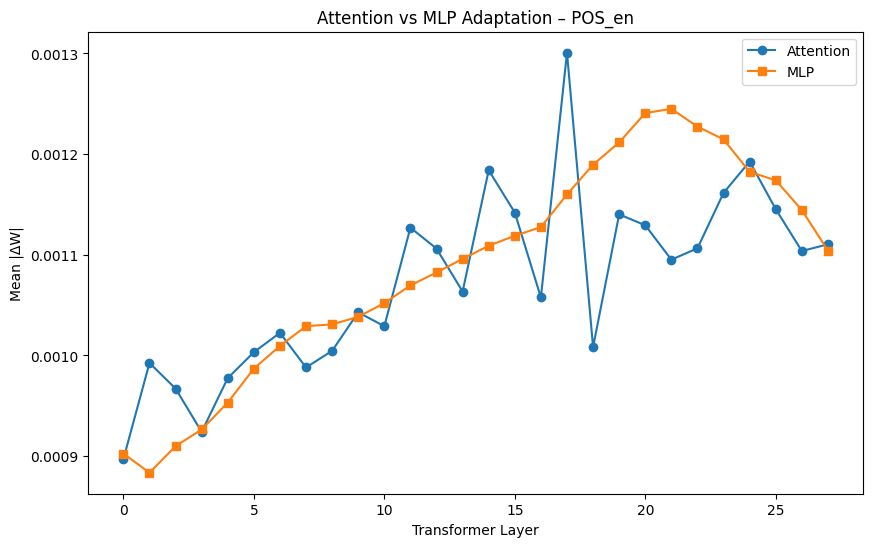

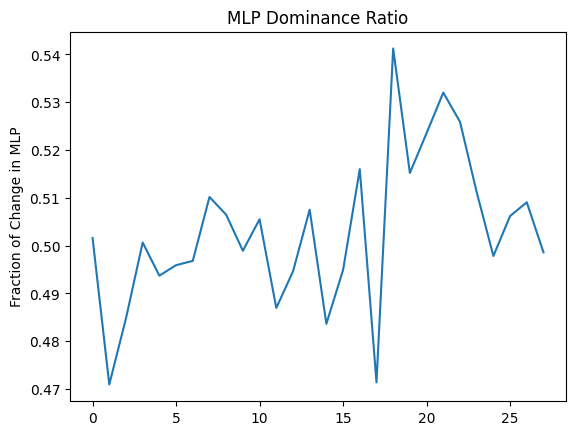

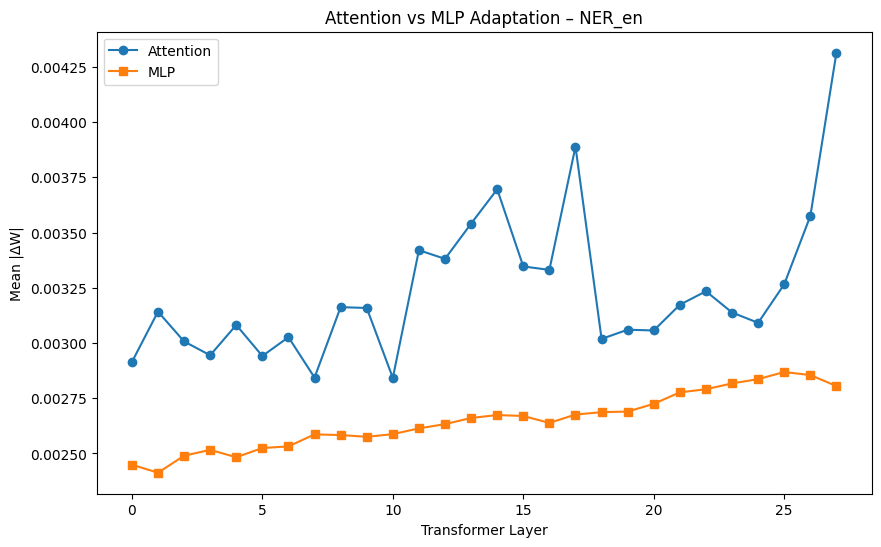

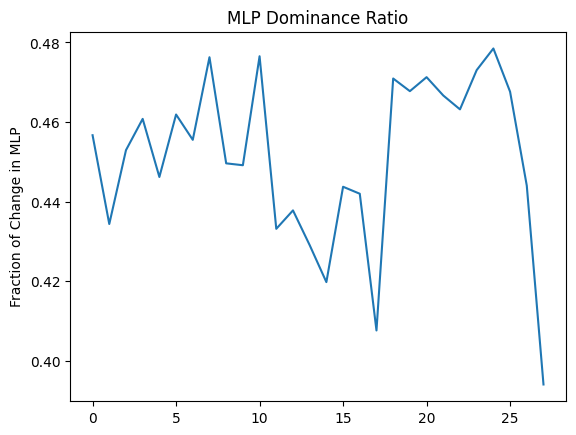

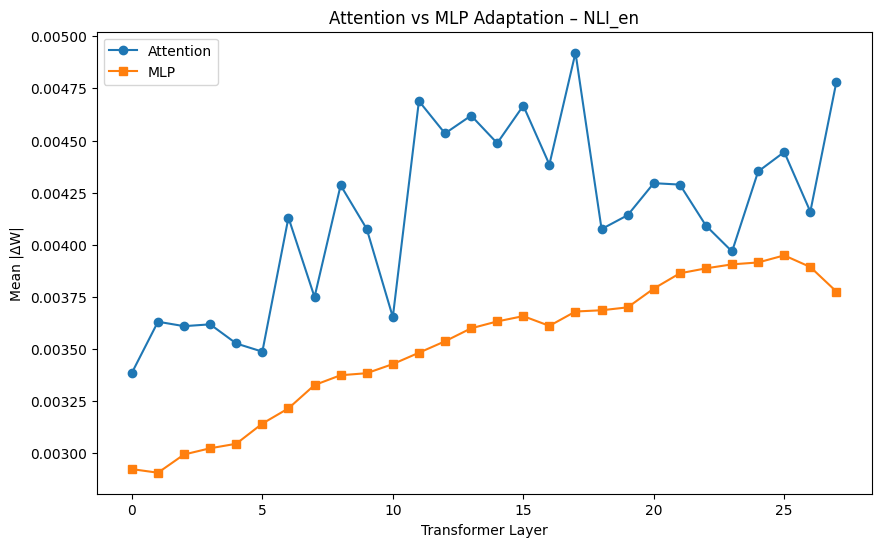

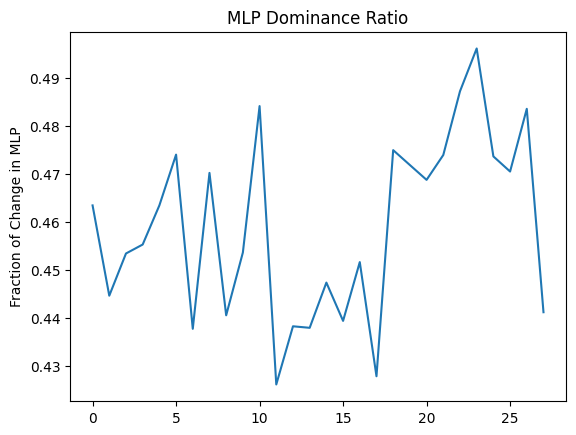

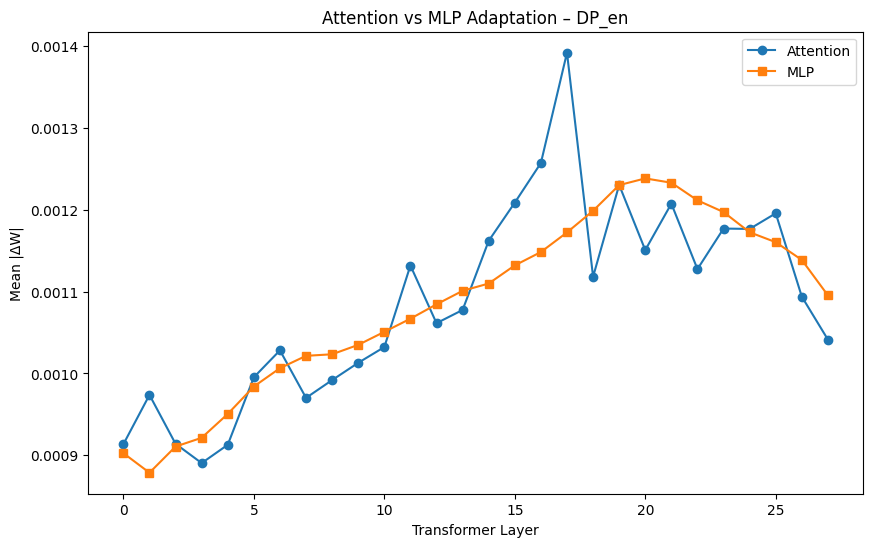

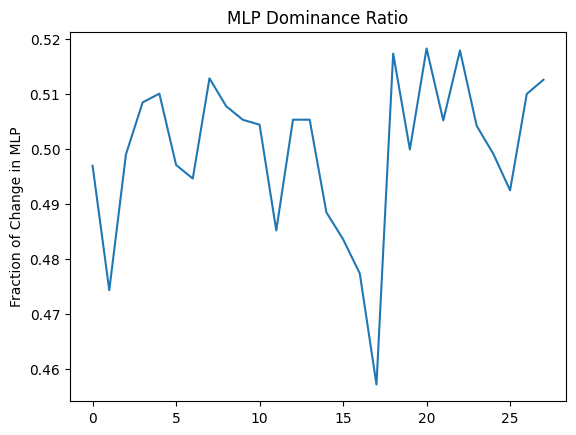

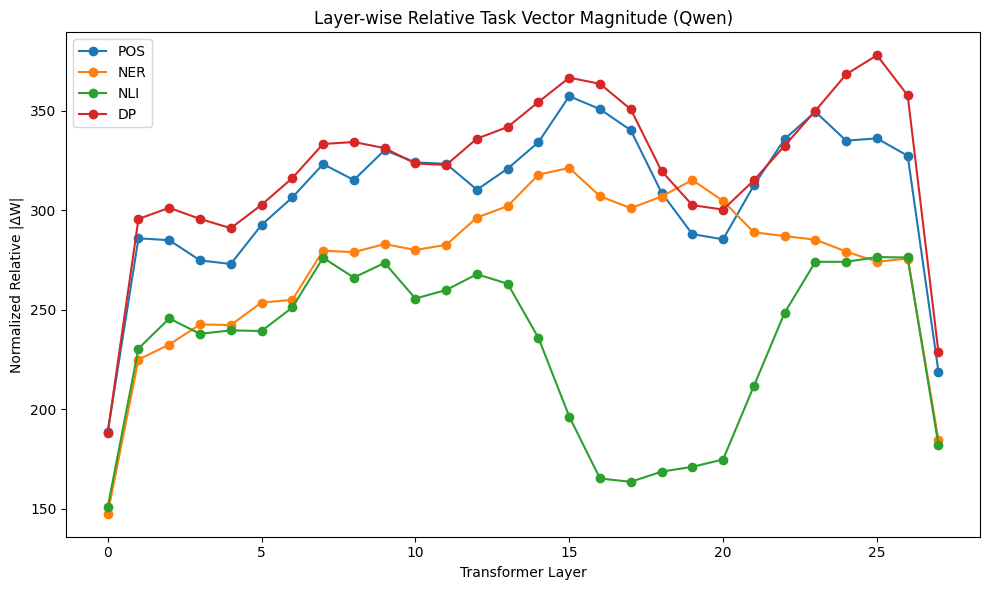

In [120]:
import re
import torch
import numpy as np
import matplotlib.pyplot as plt
from scripts.task_vectors import TaskVector
from transformers import AutoModelForCausalLM

def get_layer_number(name):
    match = re.search(r"(layers|h|block)\.(\d+)", name)
    if match:
        return int(match.group(2))
    return None

def moving_average(x, window=3):
    return np.convolve(x, np.ones(window)/window, mode='same')

qwen_model = "Qwen/Qwen3-0.6B"
tasks = ["POS_en", "NER_en", "NLI_en", "DP_en"]

base_model = AutoModelForCausalLM.from_pretrained(qwen_model)
base_params = dict(base_model.named_parameters())

all_task_curves = {}

for task in tasks:

    tv = TaskVector(
        pretrained_model=base_model,
        finetuned_model=AutoModelForCausalLM.from_pretrained(
            f"qwen/{task}", local_files_only=True
        ),
    )
    attention_layers = {}
    mlp_layers = {}

    for name, delta in tv.vector.items():

        layer_num = get_layer_number(name)
        if layer_num is None or "weight" not in name:
            continue

        magnitude = delta.abs().mean().item()

        if "self_attn" in name:
            attention_layers.setdefault(layer_num, []).append(magnitude)

        elif "mlp" in name:
            mlp_layers.setdefault(layer_num, []).append(magnitude)

    layer_values = {}
    layer_ln_scale = {}

    for name, delta in tv.vector.items():

        layer_num = get_layer_number(name)
        if layer_num is None:
            continue

        # ---- relative change ----
        if name in base_params and "weight" in name:
            base_weight = base_params[name].data
            rel_change = (delta.abs() / (base_weight.abs() + 1e-8)).mean().item()
            layer_values.setdefault(layer_num, []).append(rel_change)

        # ---- layernorm scale ----
        if "layernorm" in name.lower():
            ln_scale = delta.abs().mean().item()
            layer_ln_scale[layer_num] = ln_scale

    # average per layer
    final = {}
    for layer in layer_values:
        mean_change = np.mean(layer_values[layer])

        if layer in layer_ln_scale:
            mean_change /= (layer_ln_scale[layer] + 1e-8)

        final[layer] = mean_change

    sorted_layers = sorted(final.keys())
    sorted_means = [final[i] for i in sorted_layers]

    # smoothing
    smoothed = moving_average(sorted_means, window=3)

    all_task_curves[task.split("_")[0]] = (sorted_layers, smoothed)
    attn_curve = []
    mlp_curve = []
    layers = sorted(set(attention_layers.keys()) | set(mlp_layers.keys()))

    for layer in layers:
        attn_val = np.mean(attention_layers.get(layer, [0]))
        mlp_val = np.mean(mlp_layers.get(layer, [0]))

        attn_curve.append(attn_val)
        mlp_curve.append(mlp_val)
    plt.figure(figsize=(10,6))

    plt.plot(layers, attn_curve, label="Attention", marker="o")
    plt.plot(layers, mlp_curve, label="MLP", marker="s")

    plt.xlabel("Transformer Layer")
    plt.ylabel("Mean |ΔW|")
    plt.title(f"Attention vs MLP Adaptation – {task}")
    plt.legend()
    plt.show()

    ratio = [
        m / (m + a + 1e-8)
        for m, a in zip(mlp_curve, attn_curve)
    ]

    plt.plot(layers, ratio)
    plt.title("MLP Dominance Ratio")
    plt.ylabel("Fraction of Change in MLP")
    plt.show()

# ---- Plot all tasks together ----
plt.figure(figsize=(10, 6))

for task_name, (layers, curve) in all_task_curves.items():
    plt.plot(layers, curve, marker="o", label=task_name)

plt.xlabel("Transformer Layer")
plt.ylabel("Normalized Relative |ΔW|")
plt.title("Layer-wise Relative Task Vector Magnitude (Qwen)")
plt.legend()
plt.tight_layout()
plt.show()
